In [48]:
import os, glob
import pandas as pd
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

## Get Data  
  
Currently our script uses data X,..... 

In [49]:
# Get the directory path and collect the child and mom files
# --> We may need/want to differentiate b/w text files 04 and 09 (both related to Nutrition intake)
# --> For `glob` we need to know naming of text files - (any convention?)

In [50]:
data_dir_path = "/Users/nikkibytes/Documents/summer2019/example_data"

child04_text_files = glob.glob(os.path.join(data_dir_path, "*Child*04*"))
mom04_text_files = glob.glob(os.path.join(data_dir_path, "*Mom*04*"))

print("Text Files Found:  \nFor Mom: {} \nFor Child: {}".format(','.join(child04_text_files), ','.join(mom04_text_files)))
      
      

Text Files Found:  
For Mom: /Users/nikkibytes/Documents/summer2019/example_data/UMNUNCChild04.txt,/Users/nikkibytes/Documents/summer2019/example_data/UMNUNCChild04_.txt 
For Child: /Users/nikkibytes/Documents/summer2019/example_data/UMNUNCMom04.txt


In [51]:
# 'Sphingomyelin (mg)', 'Phosphatidycholine (mg)' -- these two not found in current dataset

## Child Data

In [52]:
# Here we concatenate the children 
#

df_list = []
for file in child04_text_files:
    orig_df=pd.read_csv(file, sep="\t")
    updated_df=orig_df[['Participant ID', 'Visit Number', 'Site ID', 'Total Grams',
                 'Energy (kcal)', 'Total Fat (g)', 'Total Carbohydrate (g)', 
                 'Total Protein (g)', 'Animal Protein (g)', 'Vegetable Protein (g)',
                 'Cholesterol (mg)', 'Total Saturated Fatty Acids (SFA) (g)',
                 'Total Monounsaturated Fatty Acids (MUFA) (g)', 'Total Polyunsaturated Fatty Acids (PUFA) (g)',
                 'Total Vitamin A Activity (International Units) (IU)', 'Vitamin D (calciferol) (mcg)', 
                 'Total Folate (mcg)', 'Vitamin B-12 (cobalamin) (mcg)', 'Magnesium (mg)',
                 'Iron (mg)', 'Zinc (mg)', 'Copper (mg)', 'Selenium (mcg)', 'PUFA 20:4 (arachidonic acid) (g)',
                 'PUFA 20:5 (eicosapentaenoic acid [EPA]) (g)', 'PUFA 22:6 (docosahexaenoic acid [DHA]) (g)', 
                 '% Calories from Fat', '% Calories from Carbohydrate', '% Calories from Protein', 'Polyunsaturated to Saturated Fat Ratio',
                 'Lutein + Zeaxanthin (mcg)', 'Choline (mg)']]
    for val in updated_df["Participant ID"]:
        _id = val.split("_")[0]
        #print(_id)
        updated_df.replace(val, _id, inplace=True)

    #print(updated_df.head())
    df_list.append(updated_df)
    #print(updated_df.shape)


print("List of dataframes made")

List of dataframes made


In [53]:
#print(df_list)
concat_df = pd.concat(df_list, ignore_index=True)
concat_df = concat_df.sort_values(by="Participant ID")
#print(final_df.head())
#print(final_df.tail())
#print(final_df.shape)
concat_df.head()


,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
0,002081,3,UNC,1151.059,757.031,40.078,81.641,17.367,6.175,11.192,...,21.227,0.257,0.000,0.129,47.647,43.137,9.176,0.403,0.000,181.094
113,002081,3,UNC,1151.059,757.031,40.078,81.641,17.367,6.175,11.192,...,21.227,0.257,0.000,0.129,47.647,43.137,9.176,0.403,0.000,181.094
2,011228,7,UNC,654.903,495.016,14.124,73.995,20.871,17.089,3.781,...,16.583,0.003,0.000,0.000,24.947,58.096,17.048,0.179,713.562,105.258
1,011228,6,UNC,488.625,538.858,20.148,77.691,11.818,5.761,6.057,...,20.679,0.030,0.001,0.001,33.525,57.654,8.721,0.670,36.171,25.735
114,011228,6,UNC,488.625,538.858,20.148,77.691,11.818,5.761,6.057,...,20.679,0.030,0.001,0.001,33.525,57.654,8.721,0.670,36.171,25.735


### Write child concatenated file (all available data on a single spread sheet, with reduced columns)

In [58]:
concat_filename = 'Child_concat_test1'
csv_filename = "{}.csv".format(concat_filename)
xlsx_filename = "{}.xlsx".format(concat_filename)
concat_filepath = os.path.join(data_dir_path, "outputs", csv_filename)
xlsx_filepath = os.path.join(data_dir_path, "outputs", xlsx_filename)


#print( new_filepath)
# write concatentation to file
writer = pd.ExcelWriter(xlsx_filepath, engine='xlsxwriter')
concat_df.to_excel(writer, sheet_name='Sheet1', index=False)
#concat_df.to_excel(concat_filepath)
concat_df.to_csv(concat_filepath, index=False)
print("Written concat file, ", concat_filepath)
umn_df = concat_df[concat_df['Site ID'] == "UMN"]
umn_df.head()

Written concat file,  /Users/nikkibytes/Documents/summer2019/example_data/outputs/Child_concat_test1.csv


,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
7,105040,1,UMN,747.639,811.309,29.932,122.328,19.810,12.285,7.525,...,26.540,0.010,0.001,0.000,32.835,57.617,9.395,0.260,465.111,56.158
120,105040,1,UMN,747.639,811.309,29.932,122.328,19.810,12.285,7.525,...,26.540,0.010,0.001,0.000,32.835,57.617,9.395,0.260,465.111,56.158
121,116056,1,UMN,1109.957,2251.429,92.665,312.114,64.180,30.140,34.040,...,106.983,0.221,0.018,0.047,35.830,53.054,11.056,0.594,1860.871,442.834
8,116056,1,UMN,1109.957,2251.429,92.665,312.114,64.180,30.140,34.040,...,106.983,0.221,0.018,0.047,35.830,53.054,11.056,0.594,1860.871,442.834
122,176427,1,UMN,845.030,1512.163,75.641,156.738,55.918,36.306,19.611,...,78.125,0.102,0.007,0.014,44.291,40.866,14.886,0.578,209.666,150.422


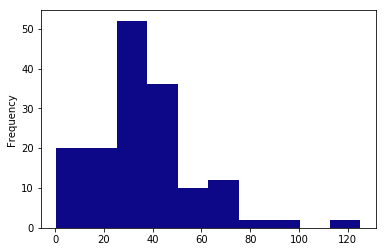

In [62]:
umn_df['Total Fat (g)'].plot(kind='hist',colormap="plasma")


In [59]:
unc_df = concat_df[concat_df['Site ID'] == "UNC"]
unc_df.head()

,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
0,002081,3,UNC,1151.059,757.031,40.078,81.641,17.367,6.175,11.192,...,21.227,0.257,0.000,0.129,47.647,43.137,9.176,0.403,0.000,181.094
113,002081,3,UNC,1151.059,757.031,40.078,81.641,17.367,6.175,11.192,...,21.227,0.257,0.000,0.129,47.647,43.137,9.176,0.403,0.000,181.094
2,011228,7,UNC,654.903,495.016,14.124,73.995,20.871,17.089,3.781,...,16.583,0.003,0.000,0.000,24.947,58.096,17.048,0.179,713.562,105.258
1,011228,6,UNC,488.625,538.858,20.148,77.691,11.818,5.761,6.057,...,20.679,0.030,0.001,0.001,33.525,57.654,8.721,0.670,36.171,25.735
114,011228,6,UNC,488.625,538.858,20.148,77.691,11.818,5.761,6.057,...,20.679,0.030,0.001,0.001,33.525,57.654,8.721,0.670,36.171,25.735


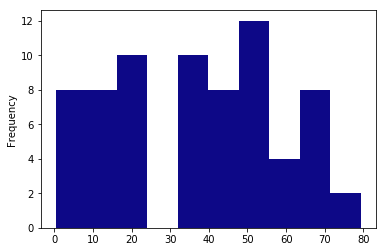

In [63]:
unc_df['Total Fat (g)'].plot(kind='hist',colormap="plasma")


In [64]:
child_mean_df=concat_df.groupby("Participant ID").mean()
child_mean_df=child_mean_df.drop(columns="Visit Number")
child_mean_df.head()

,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),Cholesterol (mg),Total Saturated Fatty Acids (SFA) (g),Total Monounsaturated Fatty Acids (MUFA) (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
Participant ID,,,,,,,,,,,,,,,,,,,,,
002081,1151.059,757.0310,40.0780,81.64100,17.3670,6.17500,11.19200,2.96900,17.68800,13.96500,...,21.227,0.2570,0.00000,0.12900,47.64700,43.13700,9.1760,0.40300,0.0000,181.0940
011228,571.764,516.9370,17.1360,75.84300,16.3445,11.42500,4.91900,34.93400,7.56850,5.40200,...,18.631,0.0165,0.00050,0.00050,29.23600,57.87500,12.8845,0.42450,374.8665,65.4965
051407,1612.145,1658.3205,63.7585,215.16875,57.8865,40.59675,17.29025,296.37275,25.19375,21.96225,...,89.625,0.2295,0.00325,0.05125,34.33575,51.82475,13.6850,0.41875,2209.8750,359.7930
105040,747.639,811.3090,29.9320,122.32800,19.8100,12.28500,7.52500,31.73300,16.70600,5.75000,...,26.540,0.0100,0.00100,0.00000,32.83500,57.61700,9.3950,0.26000,465.1110,56.1580
116056,1109.957,2251.4290,92.6650,312.11400,64.1800,30.14000,34.04000,488.23700,30.30400,35.58700,...,106.983,0.2210,0.01800,0.04700,35.83000,53.05400,11.0560,0.59400,1860.8710,442.8340


## Differences b/w Sites for child 

In [66]:
child_mean_site_df=concat_df.groupby("Site ID").mean()
child_mean_site_df.head()

,Visit Number,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),Cholesterol (mg),Total Saturated Fatty Acids (SFA) (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
Site ID,,,,,,,,,,,,,,,,,,,,,
UMN,2.064103,935.649205,915.993179,36.723859,116.249487,34.716731,24.224513,10.492077,135.262462,14.611910,...,48.843282,0.075885,0.007359,0.028051,36.439436,49.003256,14.385756,0.504218,559.565397,167.061526
UNC,5.457143,943.287629,914.289257,35.950743,118.677857,32.490314,21.303886,11.186457,95.425771,12.741886,...,45.357886,0.096000,0.004543,0.030143,34.514743,51.972086,13.415743,0.727200,502.300486,154.830600


### Write child mean file (all available data on a single spread sheet from concatenated file with subjects averaged across visits)

In [33]:
ch_mean_filename = 'Child_mean_test1'
csv_filename = "{}.csv".format(ch_mean_filename)
csv_filepath = os.path.join(data_dir_path, "outputs", csv_filename)
xlsx_filename = "{}.xlsx".format(ch_mean_filename)
xlsx_filepath = os.path.join(data_dir_path, "outputs", xlsx_filename)



writer = pd.ExcelWriter(xlsx_filepath, engine='xlsxwriter')
concat_df.to_excel(writer, sheet_name='Sheet1', index=False)
#print( new_filepath)
# write concatentation to file
child_mean_df.to_csv(xlsx_filepath)
print("Written mean file, ", xlsx_filepath)

Written mean file,  /Users/nikkibytes/Documents/summer2019/example_data/outputs/Child_mean_test1.xlsx


In [34]:
child_mean_df.columns

Index(['Total Grams', 'Energy (kcal)', 'Total Fat (g)',
       'Total Carbohydrate (g)', 'Total Protein (g)', 'Animal Protein (g)',
       'Vegetable Protein (g)', 'Cholesterol (mg)',
       'Total Saturated Fatty Acids (SFA) (g)',
       'Total Monounsaturated Fatty Acids (MUFA) (g)',
       'Total Polyunsaturated Fatty Acids (PUFA) (g)',
       'Total Vitamin A Activity (International Units) (IU)',
       'Vitamin D (calciferol) (mcg)', 'Total Folate (mcg)',
       'Vitamin B-12 (cobalamin) (mcg)', 'Magnesium (mg)', 'Iron (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Selenium (mcg)',
       'PUFA 20:4 (arachidonic acid) (g)',
       'PUFA 20:5 (eicosapentaenoic acid [EPA]) (g)',
       'PUFA 22:6 (docosahexaenoic acid [DHA]) (g)', '% Calories from Fat',
       '% Calories from Carbohydrate', '% Calories from Protein',
       'Polyunsaturated to Saturated Fat Ratio', 'Lutein + Zeaxanthin (mcg)',
       'Choline (mg)'],
      dtype='object')

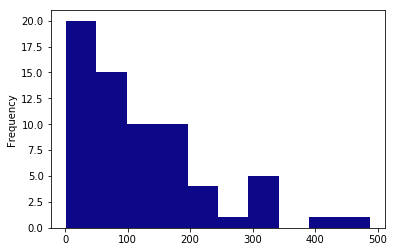

In [35]:
child_mean_df['Cholesterol (mg)'].plot(kind='hist',colormap="plasma")



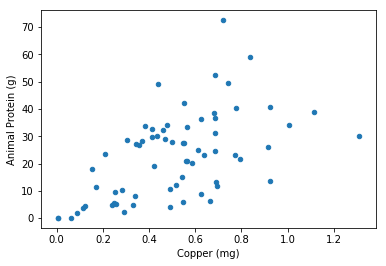

In [36]:
child_mean_df.plot(kind="scatter", x="Copper (mg)", y='Animal Protein (g)')

In [ ]:
child_umn_df_mean = concat_df[concat_df['Site ID'] == "UMN"]


## Mom data

In [37]:
# Here we concatenate the children 
# **We won't want the original filename when we concatenate all the files

mom_df_list = []
for file in mom04_text_files:
    orig_df=pd.read_csv(file, sep="\t")
    updated_df=orig_df[['Participant ID', 'Visit Number', 'Site ID', 'Total Grams',
                 'Energy (kcal)', 'Total Fat (g)', 'Total Carbohydrate (g)', 
                 'Total Protein (g)', 'Animal Protein (g)', 'Vegetable Protein (g)',
                 'Cholesterol (mg)', 'Total Saturated Fatty Acids (SFA) (g)',
                 'Total Monounsaturated Fatty Acids (MUFA) (g)', 'Total Polyunsaturated Fatty Acids (PUFA) (g)',
                 'Total Vitamin A Activity (International Units) (IU)', 'Vitamin D (calciferol) (mcg)', 
                 'Total Folate (mcg)', 'Vitamin B-12 (cobalamin) (mcg)', 'Magnesium (mg)',
                 'Iron (mg)', 'Zinc (mg)', 'Copper (mg)', 'Selenium (mcg)', 'PUFA 20:4 (arachidonic acid) (g)',
                 'PUFA 20:5 (eicosapentaenoic acid [EPA]) (g)', 'PUFA 22:6 (docosahexaenoic acid [DHA]) (g)', 
                 '% Calories from Fat', '% Calories from Carbohydrate', '% Calories from Protein', 'Polyunsaturated to Saturated Fat Ratio',
                 'Lutein + Zeaxanthin (mcg)', 'Choline (mg)']]
    for val in updated_df["Participant ID"]:
        _id = val.split("_")[0]
        #print(_id)
        updated_df.replace(val, _id, inplace=True)

    #print(updated_df.head())
    mom_df_list.append(updated_df)
    #print(updated_df.shape)


print("List of dataframes made")

List of dataframes made


In [38]:
#print(df_list)
concat_df = pd.concat(mom_df_list, ignore_index=True)
concat_df = concat_df.sort_values(by="Participant ID")
#print(final_df.head())
#print(final_df.tail())
#print(final_df.shape)
concat_df.head()


,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
0,001999,1,UMN,3557.076,2194.330,78.515,306.670,64.076,23.277,40.800,...,96.959,0.038,0.000,0.000,31.037,53.425,11.170,0.604,360.969,223.584
1,020784,5,UMN,1524.126,1096.180,50.882,104.764,63.370,47.624,15.748,...,46.988,0.169,0.579,1.244,40.317,36.412,23.230,0.767,1161.039,297.010
2,116769,5,UNC,2874.300,1822.925,56.254,278.215,66.422,48.077,18.346,...,58.892,0.178,0.019,0.061,27.223,58.163,14.681,0.345,3179.576,295.693
3,156965,4,UNC,2855.564,1803.827,67.486,244.937,61.943,45.323,16.619,...,98.652,0.104,0.006,0.011,33.145,53.034,13.874,0.479,244.979,251.092
4,249520,1,UMN,5643.841,3232.780,148.221,334.915,96.063,63.142,32.921,...,151.496,0.174,0.024,0.030,40.342,40.091,11.372,0.383,7083.138,328.715


In [39]:
umn_df = concat_df[concat_df['Site ID'] == "UMN"]
umn_df.head()

,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
0,001999,1,UMN,3557.076,2194.330,78.515,306.670,64.076,23.277,40.800,...,96.959,0.038,0.000,0.000,31.037,53.425,11.170,0.604,360.969,223.584
1,020784,5,UMN,1524.126,1096.180,50.882,104.764,63.370,47.624,15.748,...,46.988,0.169,0.579,1.244,40.317,36.412,23.230,0.767,1161.039,297.010
4,249520,1,UMN,5643.841,3232.780,148.221,334.915,96.063,63.142,32.921,...,151.496,0.174,0.024,0.030,40.342,40.091,11.372,0.383,7083.138,328.715
5,256619,1,UMN,3471.384,996.611,46.927,110.487,21.745,10.444,11.301,...,27.775,0.015,0.003,0.000,42.031,41.193,7.938,0.364,77.499,85.403
7,387363,1,UMN,1806.120,2340.634,115.610,242.792,89.108,51.151,37.960,...,172.352,0.295,0.029,0.090,43.919,40.707,15.356,0.969,1462.390,627.747


In [40]:
unc_df = concat_df[concat_df['Site ID'] == "UNC"]
unc_df.head()

,Participant ID,Visit Number,Site ID,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
2,116769,5,UNC,2874.300,1822.925,56.254,278.215,66.422,48.077,18.346,...,58.892,0.178,0.019,0.061,27.223,58.163,14.681,0.345,3179.576,295.693
3,156965,4,UNC,2855.564,1803.827,67.486,244.937,61.943,45.323,16.619,...,98.652,0.104,0.006,0.011,33.145,53.034,13.874,0.479,244.979,251.092
6,280884,1,UNC,1503.245,1659.319,63.521,221.824,59.686,24.050,35.636,...,64.617,0.036,0.000,0.000,32.814,53.333,13.720,0.584,1531.148,212.683
10,633471,1,UNC,1396.350,2155.706,104.298,127.607,169.294,149.931,19.363,...,158.898,0.311,0.031,0.093,43.289,23.703,32.625,1.089,1567.320,525.938
12,679040,4,UNC,1488.601,2384.016,132.978,186.701,116.582,98.605,17.976,...,132.519,0.373,0.050,0.082,49.396,30.484,20.167,0.381,1061.129,336.428


### Write mom concatenated file (all available data on a single spread sheet, with reduced columns)

In [68]:
concat_filename='Mom_concat_test1'
csv_filename = "{}.csv".format(concat_filename)
csv_filepath = os.path.join(data_dir_path, "outputs", csv_filename)
xlsx_filename = "{}.xlsx".format(concat_filename)
xlsx_filepath = os.path.join(data_dir_path, "outputs", xlsx_filename)


#print( new_filepath)
# write concatentation to file
# write concatentation to file
writer = pd.ExcelWriter(xlsx_filepath, engine='xlsxwriter')
concat_df.to_excel(writer, sheet_name='Sheet1', index=False)
concat_df.to_csv(csv_filepath, index=False)
print("Written concat file, ", concat_filepath)

Written concat file,  /Users/nikkibytes/Documents/summer2019/example_data/outputs/Child_concat_test1.csv


In [69]:
mom_mean_df=concat_df.groupby("Participant ID").mean()
mom_mean_df=mom_mean_df.drop(columns="Visit Number")
mom_mean_df.head()

,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),Cholesterol (mg),Total Saturated Fatty Acids (SFA) (g),Total Monounsaturated Fatty Acids (MUFA) (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
Participant ID,,,,,,,,,,,,,,,,,,,,,
002081,1151.059,757.0310,40.0780,81.64100,17.3670,6.17500,11.19200,2.96900,17.68800,13.96500,...,21.227,0.2570,0.00000,0.12900,47.64700,43.13700,9.1760,0.40300,0.0000,181.0940
011228,571.764,516.9370,17.1360,75.84300,16.3445,11.42500,4.91900,34.93400,7.56850,5.40200,...,18.631,0.0165,0.00050,0.00050,29.23600,57.87500,12.8845,0.42450,374.8665,65.4965
051407,1612.145,1658.3205,63.7585,215.16875,57.8865,40.59675,17.29025,296.37275,25.19375,21.96225,...,89.625,0.2295,0.00325,0.05125,34.33575,51.82475,13.6850,0.41875,2209.8750,359.7930
105040,747.639,811.3090,29.9320,122.32800,19.8100,12.28500,7.52500,31.73300,16.70600,5.75000,...,26.540,0.0100,0.00100,0.00000,32.83500,57.61700,9.3950,0.26000,465.1110,56.1580
116056,1109.957,2251.4290,92.6650,312.11400,64.1800,30.14000,34.04000,488.23700,30.30400,35.58700,...,106.983,0.2210,0.01800,0.04700,35.83000,53.05400,11.0560,0.59400,1860.8710,442.8340


### Write mom mean file (all available data on a single spread sheet from concatenated file with subjects averaged across visits)

In [70]:
mean_filename = "Mom_mean_test1"
csv_filename = "{}.csv".format(mean_filename)
mean_filepath = os.path.join(data_dir_path, "outputs", csv_filename)
xlsx_filename = "{}.xlsx".format(mean_filename)
xlsx_filepath = os.path.join(data_dir_path, "outputs", xlsx_filename)

writer = pd.ExcelWriter(xlsx_filepath, engine='xlsxwriter')
concat_df.to_excel(writer, sheet_name='Sheet1', index=False)
#print( new_filepath)
# write concatentation to file
mom_mean_df.to_csv(mean_filepath)
print("Written mean file, ", mean_filepath)

Written mean file,  /Users/nikkibytes/Documents/summer2019/example_data/outputs/Mom_mean_test1.csv


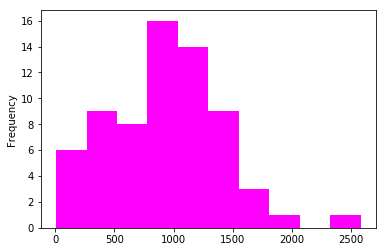

In [71]:
mom_mean_df['Total Grams'].plot(kind='hist', colormap="spring")


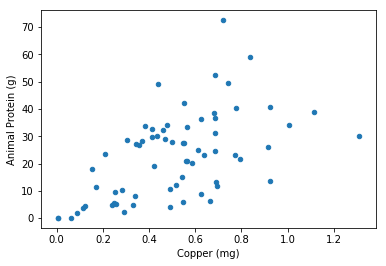

In [72]:
mom_mean_df.plot(kind="scatter", x="Copper (mg)", y='Animal Protein (g)')

In [73]:
mom_mean_site_df=concat_df.groupby("Site ID").mean()
mom_mean_site_df.head()

,Visit Number,Total Grams,Energy (kcal),Total Fat (g),Total Carbohydrate (g),Total Protein (g),Animal Protein (g),Vegetable Protein (g),Cholesterol (mg),Total Saturated Fatty Acids (SFA) (g),...,Selenium (mcg),PUFA 20:4 (arachidonic acid) (g),PUFA 20:5 (eicosapentaenoic acid [EPA]) (g),PUFA 22:6 (docosahexaenoic acid [DHA]) (g),% Calories from Fat,% Calories from Carbohydrate,% Calories from Protein,Polyunsaturated to Saturated Fat Ratio,Lutein + Zeaxanthin (mcg),Choline (mg)
Site ID,,,,,,,,,,,,,,,,,,,,,
UMN,2.064103,935.649205,915.993179,36.723859,116.249487,34.716731,24.224513,10.492077,135.262462,14.611910,...,48.843282,0.075885,0.007359,0.028051,36.439436,49.003256,14.385756,0.504218,559.565397,167.061526
UNC,5.457143,943.287629,914.289257,35.950743,118.677857,32.490314,21.303886,11.186457,95.425771,12.741886,...,45.357886,0.096000,0.004543,0.030143,34.514743,51.972086,13.415743,0.727200,502.300486,154.830600


## Doing more....

In [119]:
grams_df_mom = mom_mean_df[['Total Grams']]
grams_df_child = child_mean_df[["Total Grams"]]

grams_df_child.head()

,Total Grams
Participant ID,
002081,1151.059
011228,571.764
051407,1612.145
105040,747.639
116056,1109.957


In [ ]:
## Look at text file 09


child09_text_files = glob.glob(os.path.join(data_dir_path, "*Child*09*"))
mom09_text_files = glob.glob(os.path.join(data_dir_path, "*Mom*09*"))

print("Text Files Found:  \nFor Mom: {} \nFor Child: {}".format(','.join(child09_text_files), ','.join(mom09_text_files)))
      
      

### Gather dataframes from individual files and concatenate into a large dataframe for analysis

In [ ]:
for file in child09_text_files:
    child_df = pd.read_csv(file, encoding='latin1', sep='\t')
child_df.head()
## concat multiple files together like above 
# ..........

In [ ]:
# list column names
#for i in child_df.columns:
#    print(i)
# list categories of food from row 0 
#for i in child_df.iloc[[0]]:
#    print(child_df.loc[0, i])

In [65]:
for file in mom09_text_files:
    mom_df = pd.read_csv(file, encoding='latin1', sep='\t')
mom_df.head()

,Project Abbreviation,Participant ID,Date of Intake,FRU0100,FRU0200,FRU0300,FRU0400,FRU0500,FRU0600,FRU0700,...,MSC0300,MSC0400,MSC0500,MSC0600,MSC0700,MSC0800,MSC0900,MSC1000,GRW1300,GRS1300
0,NaN,NaN,NaN,Citrus Juice,Fruit Juice excluding Citrus Juice,Citrus Fruit,Fruit excluding Citrus Fruit,Avocado and Similar,Fried Fruits,Fruit-based Savory Snack,...,Sauces and Condiments - Regular,Sauces and Condiments - Reduced Fat,Pickled Foods,Miscellaneous Dessert,Non-grain Flour and Similar,Soup Broth,Baby Food Dessert,Miscellaneous Baby Food Mixtures,Baby Food Grain Mixtures  Whole Grain,Baby Food Grain Mixtures  Some Whole Grain
1,UMNUNCMom,001999_R1_01,09/18/2018,0,0,0,3.874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UMNUNCMom,020784_R1_06,09/25/2018,0.008,0,0,0.517,0,0,0,...,0.062,0,0,0,0,0,0,0,0,0
3,UMNUNCMom,116769_R1_6D,10/04/2018,0.543,2.100,0,2.100,0,0,0,...,0,0.737,0,0,0,0,0,0,0,0
4,UMNUNCMom,156965_R1_4D,09/09/2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
